# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from dl4cv.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `dl4cv/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
  np.random.seed(0)
  return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([0, 1, 2, 2, 1])
  return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `dl4cv/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the Softmax exercise: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs. Please first read the class description in the file, in particular note that for this exercise we use ReLU non-linearities.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027209255e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.79412040779e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from dl4cv.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)

# these should all be less than 1e-8 or so
for param_name in grads:
  f = lambda W: net.loss(X, y, reg=0.1)[0]
  param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
  print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

b2 max relative error: 4.447677e-11
b1 max relative error: 2.738421e-09
W2 max relative error: 3.440708e-09
W1 max relative error: 3.561318e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the Softmax classifier. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the Softmax classifier. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


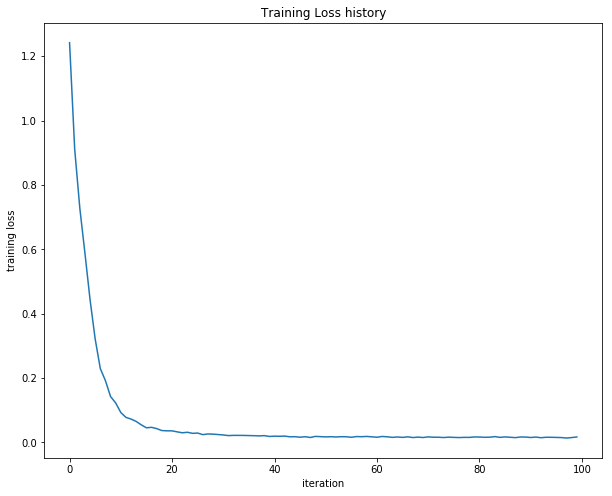

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

Train data shape:  (48000, 3072)
Train labels shape:  (48000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)
dev data shape:  (500, 3072)
dev labels shape:  (500,)


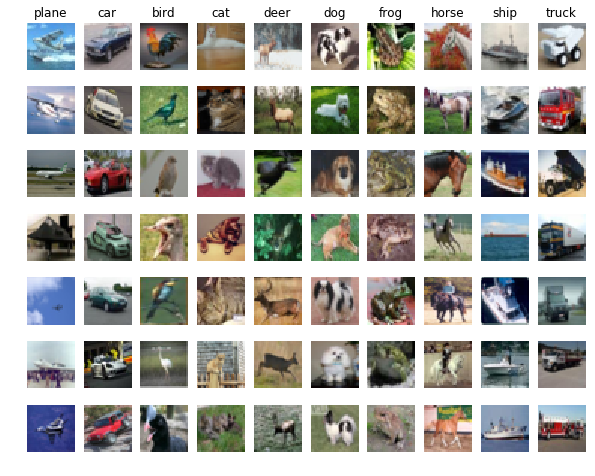

In [8]:
from dl4cv.data_utils import load_CIFAR10
from dl4cv.vis_utils import visualize_cifar10

def get_CIFAR10_data(num_training=48000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. 
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'datasets/'
    X, y = load_CIFAR10(cifar10_dir)
    

    # Our training set will be the first num_train points from the original
    # training set.
    mask = range(num_training)
    X_train = X[mask]
    y_train = y[mask]
    
    
    # Our validation set will be num_validation points from the original
    # training set.
    mask = range(num_training, num_training + num_validation)
    X_val = X[mask]
    y_val = y[mask]
    
    # We use a small subset of the training set as our test set.
    mask = range(num_training + num_validation, num_training + num_validation + num_test)
    X_test = X[mask]
    y_test = y[mask]
    
    # We will also make a development set, which is a small subset of
    # the training set. This way the development cycle is faster.
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

    return X, y, X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_raw, y_raw, X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev= get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

# visualize raw data
visualize_cifar10(X_raw, y_raw)

# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [9]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302999
iteration 100 / 1000: loss 2.302580
iteration 200 / 1000: loss 2.299592
iteration 300 / 1000: loss 2.273381
iteration 400 / 1000: loss 2.168581
iteration 500 / 1000: loss 2.047894
iteration 600 / 1000: loss 2.125996
iteration 700 / 1000: loss 1.972968
iteration 800 / 1000: loss 1.959802
iteration 900 / 1000: loss 2.073663
Validation accuracy:  0.259


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.26 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

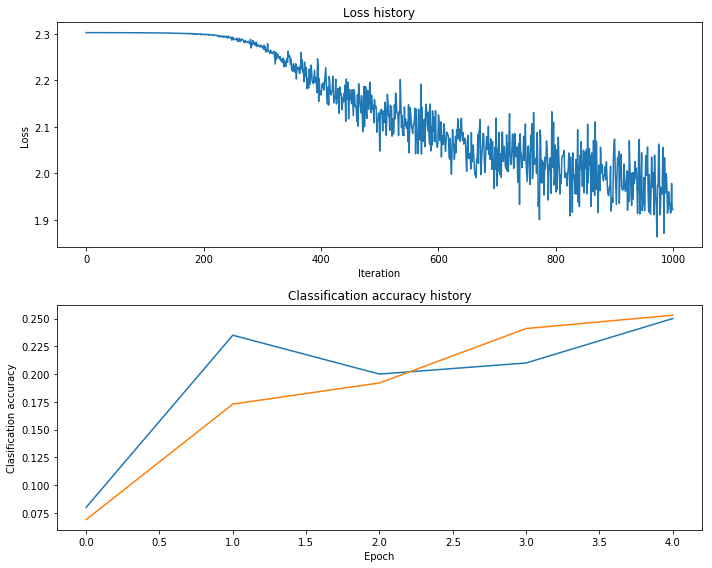

In [10]:
# Plot the loss function and train / validation accuracies
plt.subplots(nrows=2, ncols=1)

plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')

plt.tight_layout()
plt.show()

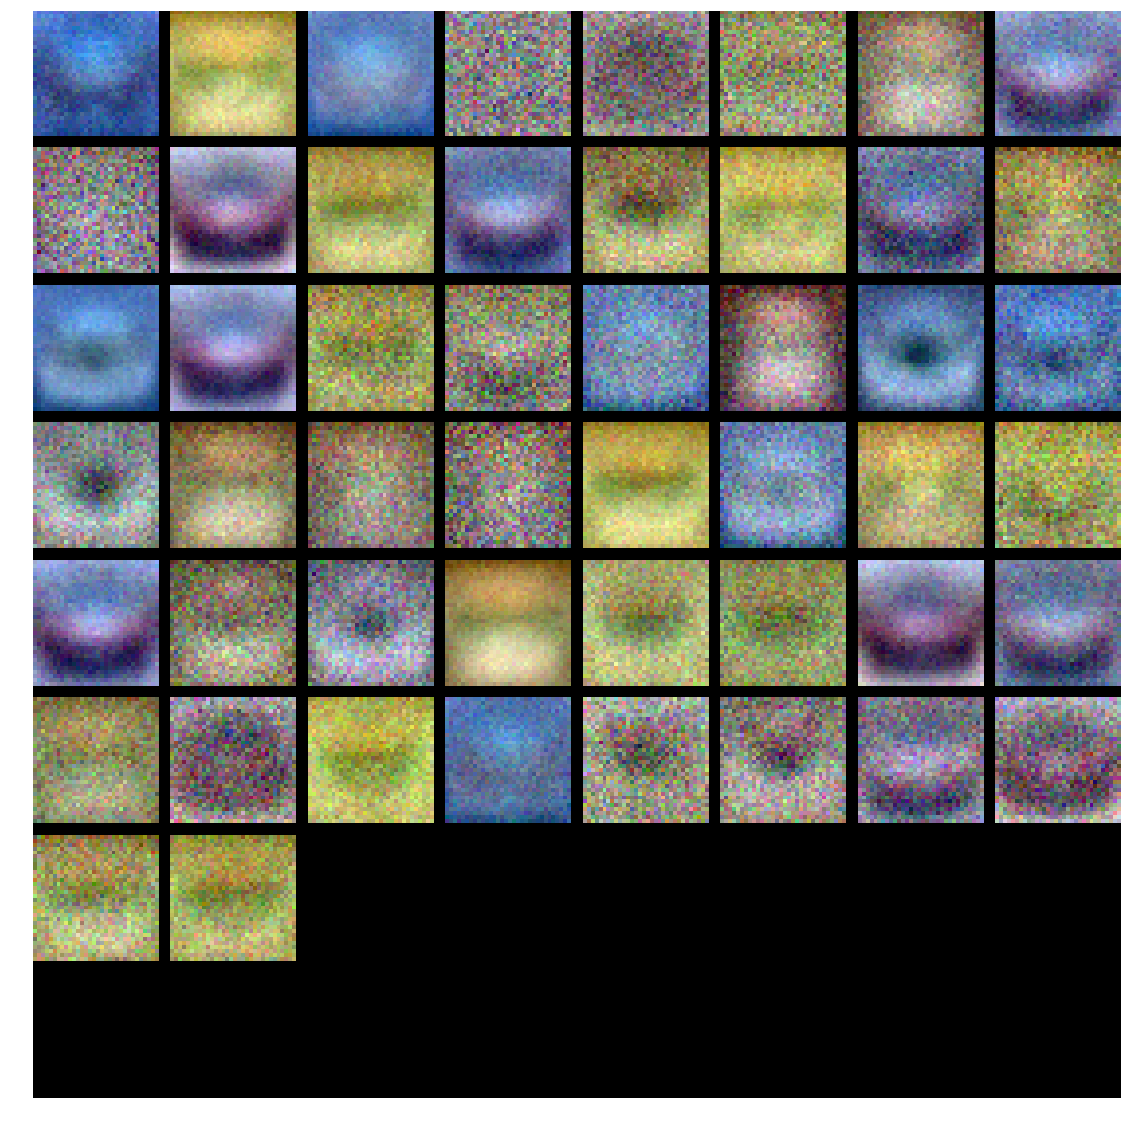

In [11]:
from dl4cv.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    fig = plt.figure(figsize=(20,20))
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should aim to achieve a classification accuracy of greater than 48% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).


**We highly encourage you to use this opportunity to get a feel for your machine learning system. Consider this kind of tuning as an essential part of getting the most out of your neural network**

In [56]:
from dl4cv.classifiers.neural_net import TwoLayerNet
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################

results = {}
val_acc = []
learning_rates = [1e-4, 1e-3, 1e-2]
regularization_strengths = [1e-3, 1e-2, 1e-1, 1, 1e1]
hiddenl_sizes = [75, 100]

for i,lr in enumerate(learning_rates):
    for j,rs in enumerate(regularization_strengths):
        for k,hs in enumerate(hiddenl_sizes):
            
            print('Parameter combination: %d / %d'
                  % ((i*len(regularization_strengths)*len(hiddenl_sizes))
                     +(j*len(hiddenl_sizes))+k+1,
                     len(learning_rates)*len(regularization_strengths)*
                     len(hiddenl_sizes)))

            net = TwoLayerNet(input_size, hs, num_classes)

            # Train the network
            stats = net.train(X_train, y_train, X_val, y_val,
                        num_iters=5000, batch_size=200,
                        learning_rate=lr, learning_rate_decay=0.95,
                        reg=rs, verbose=True)

            # Predict on the validation set
            current_acc = (net.predict(X_val) == y_val).mean()
            val_acc.append(current_acc)
            #print('Validation accuracy: ', val_acc)

            if current_acc >= max(val_acc):
                best_val = current_acc
                best_net = net

            #all_nets.append((net, np.mean(y_val == y_val_pred)))
            results[(lr, rs, hs)] = ((net.predict(X_train) == y_train).mean(),
                                 (net.predict(X_val) == y_val).mean())
            
# Print out results.
for (lr, reg, hs) in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg, hs)]
    print('lr %e reg %e hs %e train accuracy: %f val accuracy: %f' %(lr, reg, hs, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during validation: %f' % best_val)

#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################4444444443

Parameter combination: 1 / 30
iteration 0 / 5000: loss 2.302597
iteration 100 / 5000: loss 2.301829
iteration 200 / 5000: loss 2.295928
iteration 300 / 5000: loss 2.234633
iteration 400 / 5000: loss 2.155558
iteration 500 / 5000: loss 2.101223
iteration 600 / 5000: loss 2.025530
iteration 700 / 5000: loss 1.986301
iteration 800 / 5000: loss 2.016961
iteration 900 / 5000: loss 1.957948
iteration 1000 / 5000: loss 1.878843
iteration 1100 / 5000: loss 1.840884
iteration 1200 / 5000: loss 1.832725
iteration 1300 / 5000: loss 1.824487
iteration 1400 / 5000: loss 1.875632
iteration 1500 / 5000: loss 1.764479
iteration 1600 / 5000: loss 1.885883
iteration 1700 / 5000: loss 1.789807
iteration 1800 / 5000: loss 1.736282
iteration 1900 / 5000: loss 1.763633
iteration 2000 / 5000: loss 1.836613
iteration 2100 / 5000: loss 1.793647
iteration 2200 / 5000: loss 1.777203
iteration 2300 / 5000: loss 1.736654
iteration 2400 / 5000: loss 1.838141
iteration 2500 / 5000: loss 1.735074
iteration 2600 / 500

iteration 1900 / 5000: loss 1.881752
iteration 2000 / 5000: loss 1.796607
iteration 2100 / 5000: loss 1.731454
iteration 2200 / 5000: loss 1.707696
iteration 2300 / 5000: loss 1.668523
iteration 2400 / 5000: loss 1.677190
iteration 2500 / 5000: loss 1.745353
iteration 2600 / 5000: loss 1.826620
iteration 2700 / 5000: loss 1.752996
iteration 2800 / 5000: loss 1.718978
iteration 2900 / 5000: loss 1.677247
iteration 3000 / 5000: loss 1.688537
iteration 3100 / 5000: loss 1.771803
iteration 3200 / 5000: loss 1.733053
iteration 3300 / 5000: loss 1.678434
iteration 3400 / 5000: loss 1.675624
iteration 3500 / 5000: loss 1.577354
iteration 3600 / 5000: loss 1.653323
iteration 3700 / 5000: loss 1.665409
iteration 3800 / 5000: loss 1.745058
iteration 3900 / 5000: loss 1.668682
iteration 4000 / 5000: loss 1.767322
iteration 4100 / 5000: loss 1.781454
iteration 4200 / 5000: loss 1.628855
iteration 4300 / 5000: loss 1.513647
iteration 4400 / 5000: loss 1.650374
iteration 4500 / 5000: loss 1.689168
i

iteration 3900 / 5000: loss 2.026846
iteration 4000 / 5000: loss 1.990150
iteration 4100 / 5000: loss 1.956033
iteration 4200 / 5000: loss 1.988959
iteration 4300 / 5000: loss 1.939013
iteration 4400 / 5000: loss 1.872043
iteration 4500 / 5000: loss 1.972354
iteration 4600 / 5000: loss 1.932919
iteration 4700 / 5000: loss 1.939518
iteration 4800 / 5000: loss 1.983615
iteration 4900 / 5000: loss 2.002828
Parameter combination: 10 / 30
iteration 0 / 5000: loss 2.317979
iteration 100 / 5000: loss 2.314586
iteration 200 / 5000: loss 2.306435
iteration 300 / 5000: loss 2.256441
iteration 400 / 5000: loss 2.228118
iteration 500 / 5000: loss 2.172074
iteration 600 / 5000: loss 2.119794
iteration 700 / 5000: loss 2.049351
iteration 800 / 5000: loss 2.106172
iteration 900 / 5000: loss 2.057858
iteration 1000 / 5000: loss 2.084749
iteration 1100 / 5000: loss 2.048322
iteration 1200 / 5000: loss 1.973068
iteration 1300 / 5000: loss 2.041174
iteration 1400 / 5000: loss 2.027650
iteration 1500 / 50

iteration 800 / 5000: loss 1.496410
iteration 900 / 5000: loss 1.460633
iteration 1000 / 5000: loss 1.490378
iteration 1100 / 5000: loss 1.287235
iteration 1200 / 5000: loss 1.406421
iteration 1300 / 5000: loss 1.308819
iteration 1400 / 5000: loss 1.377846
iteration 1500 / 5000: loss 1.346890
iteration 1600 / 5000: loss 1.473729
iteration 1700 / 5000: loss 1.210863
iteration 1800 / 5000: loss 1.185132
iteration 1900 / 5000: loss 1.343029
iteration 2000 / 5000: loss 1.359604
iteration 2100 / 5000: loss 1.228011
iteration 2200 / 5000: loss 1.316492
iteration 2300 / 5000: loss 1.172281
iteration 2400 / 5000: loss 1.384148
iteration 2500 / 5000: loss 1.199706
iteration 2600 / 5000: loss 1.280725
iteration 2700 / 5000: loss 1.117912
iteration 2800 / 5000: loss 1.170040
iteration 2900 / 5000: loss 1.173107
iteration 3000 / 5000: loss 1.164644
iteration 3100 / 5000: loss 1.223503
iteration 3200 / 5000: loss 1.010352
iteration 3300 / 5000: loss 1.081817
iteration 3400 / 5000: loss 1.336761
ite

iteration 2800 / 5000: loss 1.360690
iteration 2900 / 5000: loss 1.487781
iteration 3000 / 5000: loss 1.446687
iteration 3100 / 5000: loss 1.501039
iteration 3200 / 5000: loss 1.449703
iteration 3300 / 5000: loss 1.468549
iteration 3400 / 5000: loss 1.441936
iteration 3500 / 5000: loss 1.486603
iteration 3600 / 5000: loss 1.335386
iteration 3700 / 5000: loss 1.453749
iteration 3800 / 5000: loss 1.405914
iteration 3900 / 5000: loss 1.381457
iteration 4000 / 5000: loss 1.384454
iteration 4100 / 5000: loss 1.393640
iteration 4200 / 5000: loss 1.423334
iteration 4300 / 5000: loss 1.315537
iteration 4400 / 5000: loss 1.330809
iteration 4500 / 5000: loss 1.481139
iteration 4600 / 5000: loss 1.354373
iteration 4700 / 5000: loss 1.468895
iteration 4800 / 5000: loss 1.400918
iteration 4900 / 5000: loss 1.492284
Parameter combination: 19 / 30
iteration 0 / 5000: loss 2.314222
iteration 100 / 5000: loss 2.080569
iteration 200 / 5000: loss 2.042558
iteration 300 / 5000: loss 1.908728
iteration 400

/home/ashqar/Documents/DL4CV/dl4cv/exercise_1/dl4cv/classifiers/neural_net.py:98: RuntimeWarning: overflow encountered in exp
  expscores = np.exp(scores)
/home/ashqar/Documents/DL4CV/dl4cv/exercise_1/dl4cv/classifiers/neural_net.py:101: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-np.log(correct_probs))/N + 0.5*reg*np.sum(W2*W2) + 0.5*reg*np.sum(W1*W1)
/home/ashqar/Documents/DL4CV/dl4cv/exercise_1/dl4cv/classifiers/neural_net.py:115: RuntimeWarning: overflow encountered in exp
  dscores = np.exp(scores)/np.sum(np.exp(scores), axis=1, keepdims=1)
/home/ashqar/Documents/DL4CV/dl4cv/exercise_1/dl4cv/classifiers/neural_net.py:115: RuntimeWarning: invalid value encountered in true_divide
  dscores = np.exp(scores)/np.sum(np.exp(scores), axis=1, keepdims=1)
/home/ashqar/Documents/DL4CV/dl4cv/exercise_1/dl4cv/classifiers/neural_net.py:120: RuntimeWarning: invalid value encountered in less_equal
  pass1bp[pass1<=0] = 0


iteration 100 / 5000: loss nan
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 / 5000: loss nan
iteration 1700 / 5000: loss nan
iteration 1800 / 5000: loss nan
iteration 1900 / 5000: loss nan
iteration 2000 / 5000: loss nan
iteration 2100 / 5000: loss nan
iteration 2200 / 5000: loss nan
iteration 2300 / 5000: loss nan
iteration 2400 / 5000: loss nan
iteration 2500 / 5000: loss nan
iteration 2600 / 5000: loss nan
iteration 2700 / 5000: loss nan
iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 / 5000: loss nan
iteration 3200 / 

/home/ashqar/Documents/DL4CV/dl4cv/exercise_1/dl4cv/classifiers/neural_net.py:100: RuntimeWarning: invalid value encountered in true_divide
  correct_probs = correct_scores/np.sum(expscores, axis=1)


iteration 100 / 5000: loss nan
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 / 5000: loss nan
iteration 1700 / 5000: loss nan
iteration 1800 / 5000: loss nan
iteration 1900 / 5000: loss nan
iteration 2000 / 5000: loss nan
iteration 2100 / 5000: loss nan
iteration 2200 / 5000: loss nan
iteration 2300 / 5000: loss nan
iteration 2400 / 5000: loss nan
iteration 2500 / 5000: loss nan
iteration 2600 / 5000: loss nan
iteration 2700 / 5000: loss nan
iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 / 5000: loss nan
iteration 3200 / 

iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 / 5000: loss nan
iteration 1700 / 5000: loss nan
iteration 1800 / 5000: loss nan
iteration 1900 / 5000: loss nan
iteration 2000 / 5000: loss nan
iteration 2100 / 5000: loss nan
iteration 2200 / 5000: loss nan
iteration 2300 / 5000: loss nan
iteration 2400 / 5000: loss nan
iteration 2500 / 5000: loss nan
iteration 2600 / 5000: loss nan
iteration 2700 / 5000: loss nan
iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 / 5000: loss nan
iteration 3200 / 5000: loss nan
iteration 3300 / 5000: loss nan
iteration 3400 / 5000: loss nan
iteration 3500

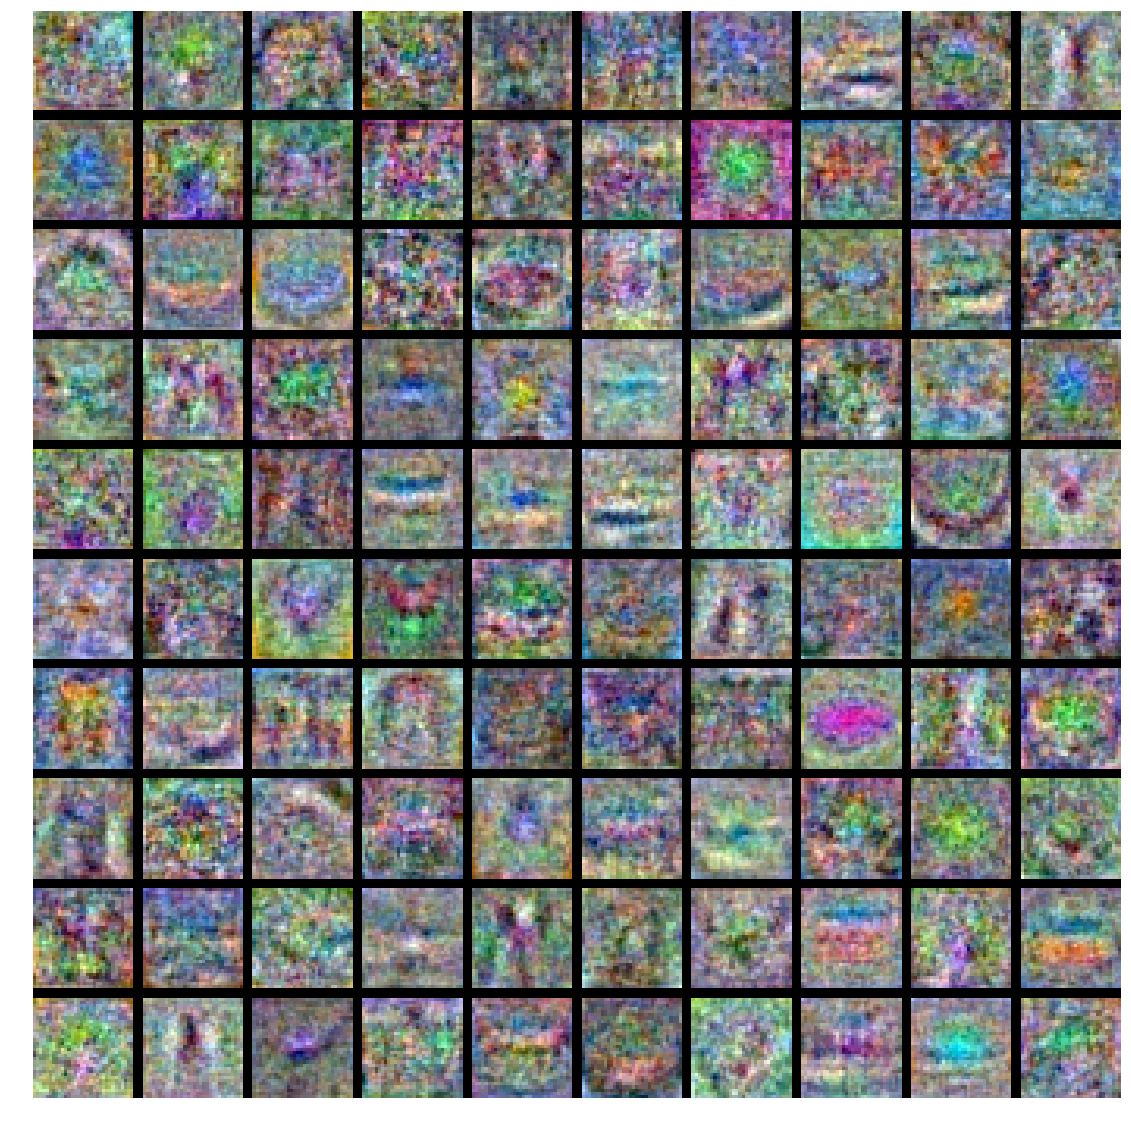

In [57]:
# visualize the weights of the best network
show_net_weights(best_net)

<div class="alert alert-info">
    <h3>Inline Question</h3>
    <p>Describe what your visualized two-layer-net weights look like, in particular in contrast to the softmax weights of the first exercise of this set.</p>
</div>

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [58]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.523


## Save the model

When you are satisfied with your training, save the model for submission.

In [59]:
from dl4cv.model_savers import save_two_layer_net
save_two_layer_net(best_net)

## Scoring function
We will score the model you have just saved based on the classification accuracy on our test dataset. The scoring function should represent the difficulty of obtaining a good test accuracy and should therefore give 0 points for worse results than random guessing, should be linear in a first regime and exponential beyond that. The onset of exponential growth depends on the problem. In that region you get twice as many points for an additional 10% accuracy.

For this problem we specifically use the following scoring function:

$$f(x) = \left\{
	\begin{array}{ll}
		0  & \mbox{if } x \leq 0.1 \\
		100x & \mbox{if } 0.1 < x \leq 0.5 \\
        \left(\frac{50}{\exp(0.5 \ln(2)/0.1)}\right) \exp(x \ln(2)/0.1) & \mbox{if } 0.5 < x \leq 1
	\end{array}
\right.$$

The function can be plotted in the following cell.

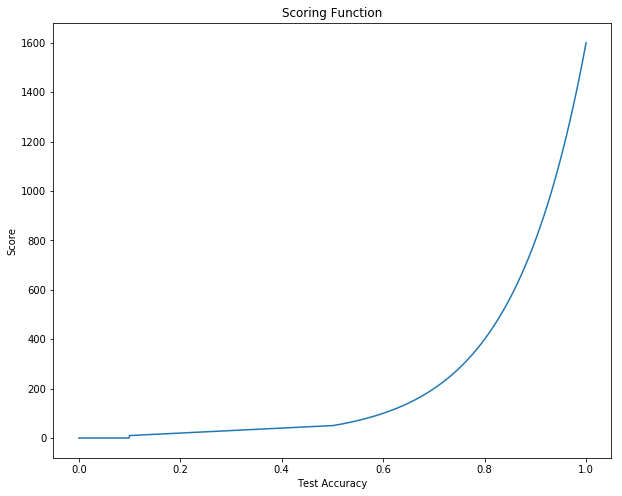

In [60]:
from dl4cv.data_utils import scoring_function

x = np.linspace(0, 1, num=1000)
plt.plot(x, scoring_function(x, lin_exp_boundary=0.5, doubling_rate=0.1))
plt.title('Scoring Function')
plt.xlabel('Test Accuracy')
plt.ylabel('Score')
plt.show()